<a href="https://colab.research.google.com/github/chrishuskey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Assignment_Unit_1%2C_Sprint_1%2C_Module_1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
import pandas as pd

column_headers_heart = ['age', 'sex_is_male', 'chest_pain_type', 'resting_bp', 'cholesterol', 
                  'FBS_above_120mg', 'resting_ECG', 'max_heart_rate', 
                  'exercise_angina', 'ST_depression', 'slope_of_peak_exercise_ST', 
                  'num_vessels_fluoro', 'thal', 'heart_disease_severity']

# Imports the dataset as a dataframe, from its UCI URL, with above column names:
heart_df_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_df = pd.read_csv(heart_df_URL, header=None, names=column_headers_heart)

In [407]:
# We have no NaN values (yet), but viewing the raw dataset, we can see multiple 
# values that are simply "?":
heart_df.loc[302]['num_vessels_fluoro']

'?'

In [0]:
# --> We replace all "?" values with NaN here:
import numpy as np

heart_df = heart_df.replace('?', np.NaN)  # replace in heart_df itself, not copy

In [409]:
heart_df.loc[302]['num_vessels_fluoro']

nan

In [410]:
# Find how many missing (NaN) values there are in the dataframe:
heart_df.isnull().sum()

age                          0
sex_is_male                  0
chest_pain_type              0
resting_bp                   0
cholesterol                  0
FBS_above_120mg              0
resting_ECG                  0
max_heart_rate               0
exercise_angina              0
ST_depression                0
slope_of_peak_exercise_ST    0
num_vessels_fluoro           4
thal                         2
heart_disease_severity       0
dtype: int64

In [0]:
# Because there are so few rows with NaN values (<2% of total rows), and the 
# NaN values are in what look like the two least useful features (columns), 
# let's simply drop those rows completely:
heart_df.dropna(inplace=True)

In [0]:
# Add a simplified version of the heart_disease_severity column, that simply
# tells us if there was heart disease or not, regardless of the 1/2/3/4 severity.
# We will probably only want to focus on this categorical yes/no for now.
heart_df['heart_disease_presence'] = heart_df['heart_disease_severity']
heart_df['heart_disease_presence'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}, value=None, inplace=True)

In [413]:
heart_df.shape

(297, 15)

In [414]:
heart_df.dtypes

age                          float64
sex_is_male                  float64
chest_pain_type              float64
resting_bp                   float64
cholesterol                  float64
FBS_above_120mg              float64
resting_ECG                  float64
max_heart_rate               float64
exercise_angina              float64
ST_depression                float64
slope_of_peak_exercise_ST    float64
num_vessels_fluoro            object
thal                          object
heart_disease_severity         int64
heart_disease_presence         int64
dtype: object

In [415]:
heart_df.describe()

,age,sex_is_male,chest_pain_type,resting_bp,cholesterol,FBS_above_120mg,resting_ECG,max_heart_rate,exercise_angina,ST_depression,slope_of_peak_exercise_ST,heart_disease_severity,heart_disease_presence
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [417]:
# Let's us import a dataset file into Google CoLab (Drive for this notebook):
from google.colab import files
files.upload()

{}

In [0]:
# Creates a pandas dataframe from the car dataset we imported, with columns
# labeled as below:
column_headers_car = ['price', 'cost_of_maintenance', 'num_doors', 
                      'num_passengers', 'trunk_size', 'safety_rating', 
                      'car_acceptability_result']

car_df = pd.read_csv('car.data', header=None, names=column_headers_car)

In [419]:
# Replaces all of the ordinal categorical values in the car evaluation dataset
# with integers that represent them.

car_df.replace({'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}, inplace=True)
car_df.replace({'small': 1, 'big': 3}, inplace=True)
car_df.replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}, inplace=True)

# For doors and passengers, we assume the majority of >4 are minivans or 
#large SUVs, so set anything >4 to 6 for simplicity.
car_df.replace({'5more': 6, 'more': 6}, inplace=True)
car_df.head(10)

,price,cost_of_maintenance,num_doors,num_passengers,trunk_size,safety_rating,car_acceptability_result
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
5,4,4,2,2,2,3,0
6,4,4,2,2,3,1,0
7,4,4,2,2,3,2,0
8,4,4,2,2,3,3,0
9,4,4,2,4,1,1,0


In [420]:
# Check if there are any missing values:
car_df.isnull().sum()

price                       0
cost_of_maintenance         0
num_doors                   0
num_passengers              0
trunk_size                  0
safety_rating               0
car_acceptability_result    0
dtype: int64

In [421]:
car_df.shape

(1728, 7)

In [422]:
car_df.dtypes

price                        int64
cost_of_maintenance          int64
num_doors                   object
num_passengers              object
trunk_size                   int64
safety_rating                int64
car_acceptability_result     int64
dtype: object

In [0]:
# Convert values in ['num_doors'] and ['num_passengers'] columns from 
# dtype=object to to ints (because easier to work with if all same type, and 
# these are already represented as ints anyway).
car_df['num_doors'].replace({'2': 2, '3': 3, '4': 4, '6': 6}, inplace=True)
car_df['num_passengers'].replace({'2': 2, '4': 4, '6': 6}, inplace=True)

In [424]:
# Check to make sure they are now all ints:
car_df.dtypes

price                       int64
cost_of_maintenance         int64
num_doors                   int64
num_passengers              int64
trunk_size                  int64
safety_rating               int64
car_acceptability_result    int64
dtype: object

In [425]:
car_df.describe()

,price,cost_of_maintenance,num_doors,num_passengers,trunk_size,safety_rating,car_acceptability_result
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.750000,4.000000,2.000000,2.000000,0.414931
std,1.118358,1.118358,1.479448,1.633466,0.816733,0.816733,0.740700
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,0.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,0.000000
75%,3.250000,3.250000,4.500000,6.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,6.000000,6.000000,3.000000,3.000000,3.000000


In [426]:
# By using value_counts, we can see that the vast majority (70%) of the cars
# are deemed unacceptable.
car_df['car_acceptability_result'].value_counts(normalize=True)

0    0.700231
1    0.222222
2    0.039931
3    0.037616
Name: car_acceptability_result, dtype: float64

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [427]:
# Cross tabulates safety rating of car vs. car accepatability evaluation.

# This shows us that safety rating does appear to have an effect: all 
# cars with a safety rating of 1 ("low") were deemed unacceptable, whereas
# more than half of the cars with a safety rating of 3 ("high") 
# were deemed to be acceptable or better.
safety_crosstab = pd.crosstab(car_df['safety_rating'], car_df['car_acceptability_result'], normalize=True)
safety_crosstab

car_acceptability_result,0,1,2,3
safety_rating,,,,
1,0.333333,0.000000,0.000000,0.000000
2,0.206597,0.104167,0.022569,0.000000
3,0.160301,0.118056,0.017361,0.037616


In [428]:
# Cross tabulates price (buying) of the car vs. car accepatability evaluation.

# It appears that more expensive cars may receive lower acceptability ratings. 
price_table = pd.crosstab(car_df['price'], car_df['car_acceptability_result'], normalize=True)
price_table

car_acceptability_result,0,1,2,3
price,,,,
1,0.149306,0.051505,0.02662,0.022569
2,0.155093,0.066551,0.01331,0.015046
3,0.187500,0.062500,0.00000,0.000000
4,0.208333,0.041667,0.00000,0.000000


In [429]:
# BUT 70% of cars across the entire dataset are deemed unacceptable already.
# So let's see if those at high prices are disproptionally deemed unacceptable,
# or just the same as the overall sample of cars:
print('% of Cars Deemed Unacceptable, by Car Price:\n')
print(round(price_table.loc[1][0] / price_table.loc[1].sum(), 2) * 100, '% of low-priced cars')
print(round(price_table.loc[2][0] / price_table.loc[2].sum(), 2) * 100, '% of medium-priced cars')
print(round(price_table.loc[3][0] / price_table.loc[3].sum(), 2) * 100, '% of high-priced cars')
print(round(price_table.loc[4][0] / price_table.loc[4].sum(), 2) * 100, '% of very high-priced cars')

# As above, we can see that:  Yes, high-priced and very high-priced cars are 
# deemed "unacceptable" at a higher rate than the overall sample population.

% of Cars Deemed Unacceptable, by Car Price:

60.0 % of low-priced cars
62.0 % of medium-priced cars
75.0 % of high-priced cars
83.0 % of very high-priced cars


In [430]:
# Cross tabulates the car's cost of maintenance vs. car accepatability evaluation.

# It appears that cars requiring high costs for maintenance are also deemed 
# "unacceptable" at a higher rate than those with low maintenance costs:
pd.crosstab(car_df['cost_of_maintenance'], car_df['car_acceptability_result'], normalize=True)

car_acceptability_result,0,1,2,3
cost_of_maintenance,,,,
1,0.155093,0.053241,0.02662,0.015046
2,0.155093,0.066551,0.01331,0.015046
3,0.181713,0.060764,0.00000,0.007523
4,0.208333,0.041667,0.00000,0.000000


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [431]:
# Doing this with the Heart Disease dataset, because we already got a
# sense of the Car Evaluation dataset via the cross-tabulations above and below.

import matplotlib.pyplot as plt

# First, let's just take a look at the distribution of heart disease occurence:
y_labels_overall = heart_df['heart_disease_presence'].value_counts(normalize=True)
y_labels_overall

0    0.538721
1    0.461279
Name: heart_disease_presence, dtype: float64

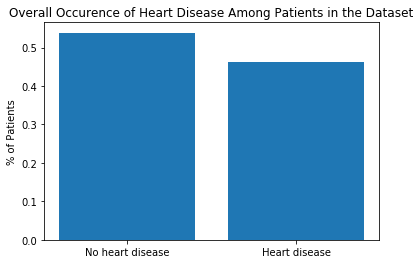

In [432]:
plt.bar(['No heart disease', 'Heart disease'], y_labels_overall)
plt.title('Overall Occurence of Heart Disease Among Patients in the Dataset')
plt.ylabel('% of Patients')
plt.show()

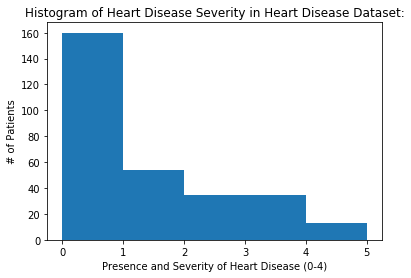

In [433]:
# And of heart disease severity:
plt.hist(heart_df['heart_disease_severity'], bins=[0, 1, 2, 3, 4, 5])
plt.title('Histogram of Heart Disease Severity in Heart Disease Dataset:')
plt.xlabel('Presence and Severity of Heart Disease (0-4)')
plt.ylabel('# of Patients')
plt.show()

In [0]:
# Split into "no heart disease" and "had heart disease" datasets, so we 
# can chart them separately and compare:
no_heart_disease = heart_df[heart_df['heart_disease_presence'] == 0]
yes_heart_disease = heart_df[heart_df['heart_disease_presence'] == 1]

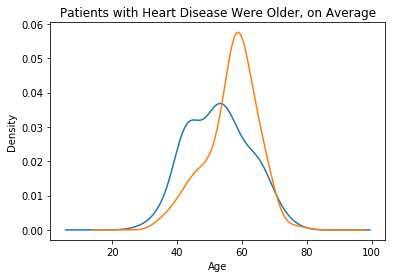

In [435]:
# Let's see how age and heart disease (yes/no) are related with a probability 
# density function (as a kernal density estimate plot):
no_heart_disease['age'].plot.density()
yes_heart_disease['age'].plot.density()
plt.title('Patients with Heart Disease Were Older, on Average')
plt.xlabel('Age')
plt.show()

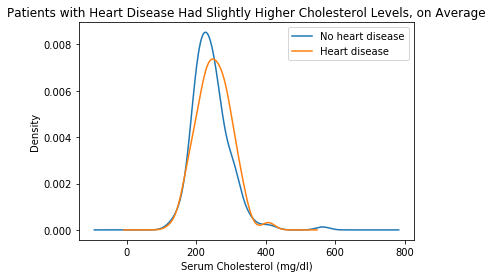

In [436]:
# What about serum (blood) cholesterol levels and heart disease (presence):
no_heart_disease['cholesterol'].plot.density()
yes_heart_disease['cholesterol'].plot.density()
plt.title('Patients with Heart Disease Had Slightly Higher Cholesterol Levels, on Average')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.legend(['No heart disease', 'Heart disease'])
plt.show()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


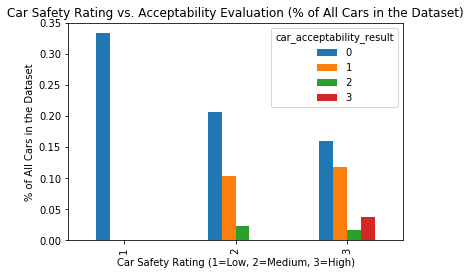

In [438]:
# Plot on a chart the cross-tabulates of car safety ratings 
# vs. car accepatability evaluations.

# This shows us that safety rating does appear to have an effect: all 
# cars with a safety rating of 1 ("low") were deemed unacceptable, whereas
# more than half of the cars with a safety rating of 3 ("high") 
# were deemed to be acceptable or better.
safety_crosstab.plot(kind='bar')
plt.title('Car Safety Rating vs. Acceptability Evaluation (% of All Cars in the Dataset)')
plt.xlabel('Car Safety Rating (1=Low, 2=Medium, 3=High)')
plt.ylabel('% of All Cars in the Dataset')
plt.show()

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
# To add this weekend.